# Order Delivery Time Prediction
# Linear Regression Assignment
# Report Parcel Delivery Time Estimation


## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [12]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import math

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [14]:
# Importing the file porter_data_1.csv
df = pd.read_csv('/Users/priyankachatterjee/Downloads/Delivery_Starter/porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [18]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')
#Display the first few rows to show the converted date time column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [20]:
# Convert categorical features to category type


categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')
df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   market_id               175777 non-null  category
 1   store_primary_category  175777 non-null  category
 2   order_protocol          175777 non-null  category
dtypes: category(3)
memory usage: 518.3 KB


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [23]:
# Calculate time taken in minutes
df['time_taken']= (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
# remove negative time_taken value as they are illogical.
initial_rows = len(df)
df = df[df['time_taken']>0].copy()
print(f"Time taken calculated. Removed {initial_rows - len(df)} rows with negative time_taken.")
df.head()

Time taken calculated. Removed 0 rows with negative time_taken.


market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  
0                      21.0     34.44        47.0  
1                       2.0     27.60        44.0  
2                      18.0     11.56        55.0  
3                       8.0     31.80        59.0  
4                       7.0      8.20        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [25]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour_of_day'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df.columns
df['isWeekend'] = df['day_of_week'].apply(lambda x: 1 if x>5 else 0) # 5 for saturday and 6 for sunday
df['isWeekend'] = df['isWeekend'].astype('category')
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  hour_of_day  day_of_week  \
0                      21.0     34.44        47.0           22            4   
1                       2.0     27.60        44.0           21            1   
2                      18.0     11.56        55.0            0            0   
3                       8.0     31.80        59.0            3            3   
4                       7.0      8.20        46.0            2            1   

  isWeekend  
0         0  
1         0  
2         0  
3         0  
4         0

In [26]:
# Drop unnecessary columns
df = df.drop(['created_at', 'actual_delivery_time','day_of_week'], axis=1)
df.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken  \
0                14.0                      21.0     34.44        47.0   
1                 2.0                       2.0     27.60        44.0   
2                 6.0                      18.0     11.56        55.0   
3                 6.0                       8.0     31.80        59.0   
4                 5.0                       7.0      8.20        46.0   

   hour_of_day isWeekend  
0           22         0  
1           21         0  
2            0         0  
3            3         0  
4            2         0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [29]:
# Define target variable (y) and features (X)
y = df['time_taken']
X = df.drop(columns=['time_taken']) #X include all the columns except the targeted variables

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size =0.2, random_state = 100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(140621, 14)
(35156, 14)
(140621,)
(35156,)


In [32]:
#Recombine X_train and y_train for easier EDA on the training set
train_df = pd.concat([X_train,y_train], axis =1)
print("Training Data combine for EDA.")
train_df.head()

Training Data combine for EDA.


market_id store_primary_category order_protocol  total_items  subtotal  \
42111        3.0                      7            2.0            1      1350   
58452        2.0                     46            5.0            5      4285   
20644        4.0                     45            2.0            6      7880   
79735        4.0                     45            2.0            3      3660   
167933       1.0                      4            5.0            5      8575   

        num_distinct_items  min_item_price  max_item_price  \
42111                    1            1350            1350   
58452                    5             495             900   
20644                    3            1195            1450   
79735                    3             975            1450   
167933                   5            1200            2625   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
42111                    23.0                20.0                      19.0   
58452                   112.0               100.0                     207.0   
20644                    80.0                79.0                     115.0   
79735                   127.0               106.0                     173.0   
167933                   44.0                44.0                      61.0   

        distance  hour_of_day isWeekend  time_taken  
42111       9.60           20         0        32.0  
58452      34.56            2         0        71.0  
20644      34.92            3         0        62.0  
79735      25.76            2         0        54.0  
167933     17.72            2         0        56.0

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [35]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = train_df.select_dtypes(include = np.number).columns.tolist()

categorical_cols = train_df.select_dtypes(include = 'category').columns.tolist()
print("\n Numerical columns: ", numerical_cols)
print("\n Categorical columns: ", categorical_cols)


 Numerical columns:  ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour_of_day', 'time_taken']

 Categorical columns:  ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness


 Plotting Distribution for numerical columns..


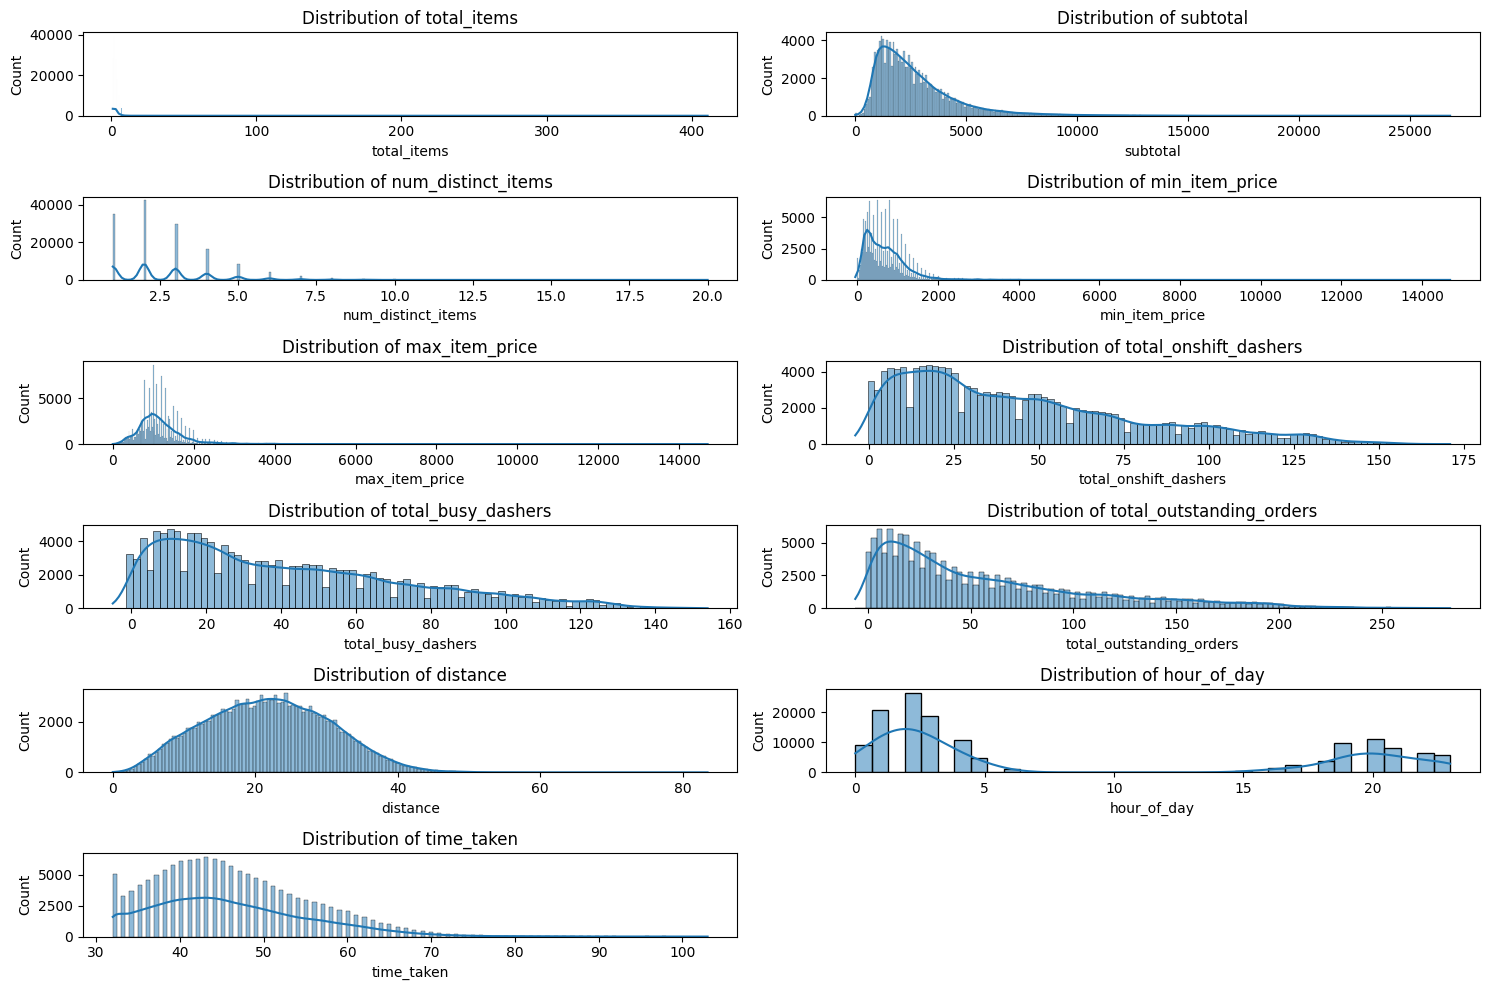

In [37]:
# Plot distributions for all numerical columns
print("\n Plotting Distribution for numerical columns..")
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) //2+1, 2, i+1)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features


 Plotting distribution for categorical columns..


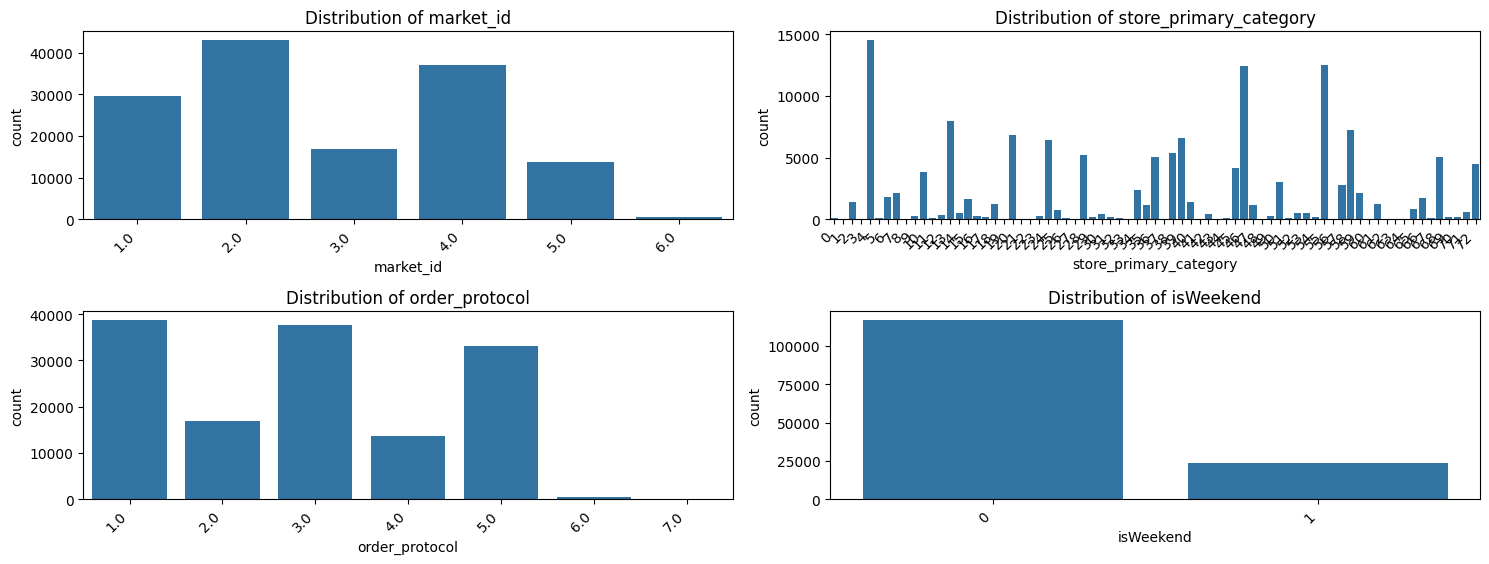

In [39]:
# Distribution of categorical columns
print("\n Plotting distribution for categorical columns..")
plt.figure(figsize=(15,8))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols) // 2+1, 2, i+1)
    sns.countplot(data = train_df, x =col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

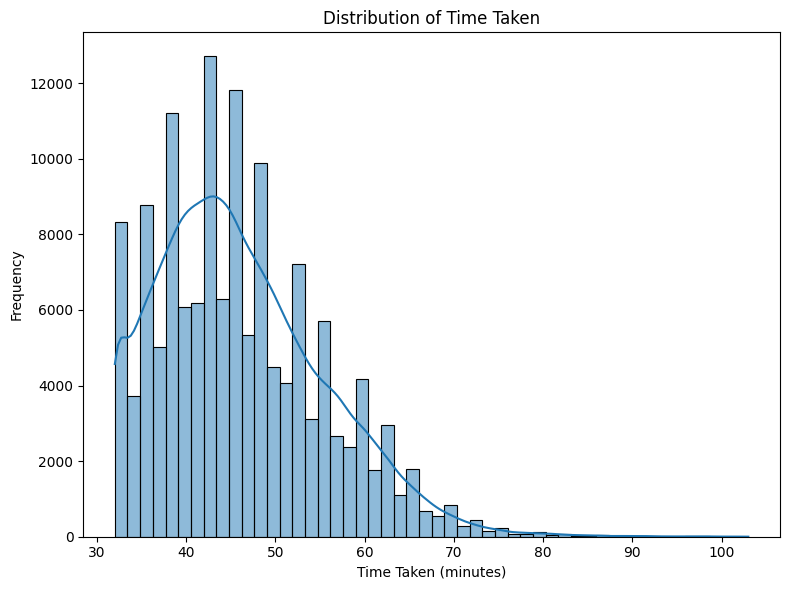

In [41]:
# Distribution of time_taken
plt.figure(figsize =(8,6))
sns.histplot(train_df['time_taken'], kde=True, bins=50)
plt.title('Distribution of Time Taken')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`


 Plotting scatter for numerical features vs time_taken..


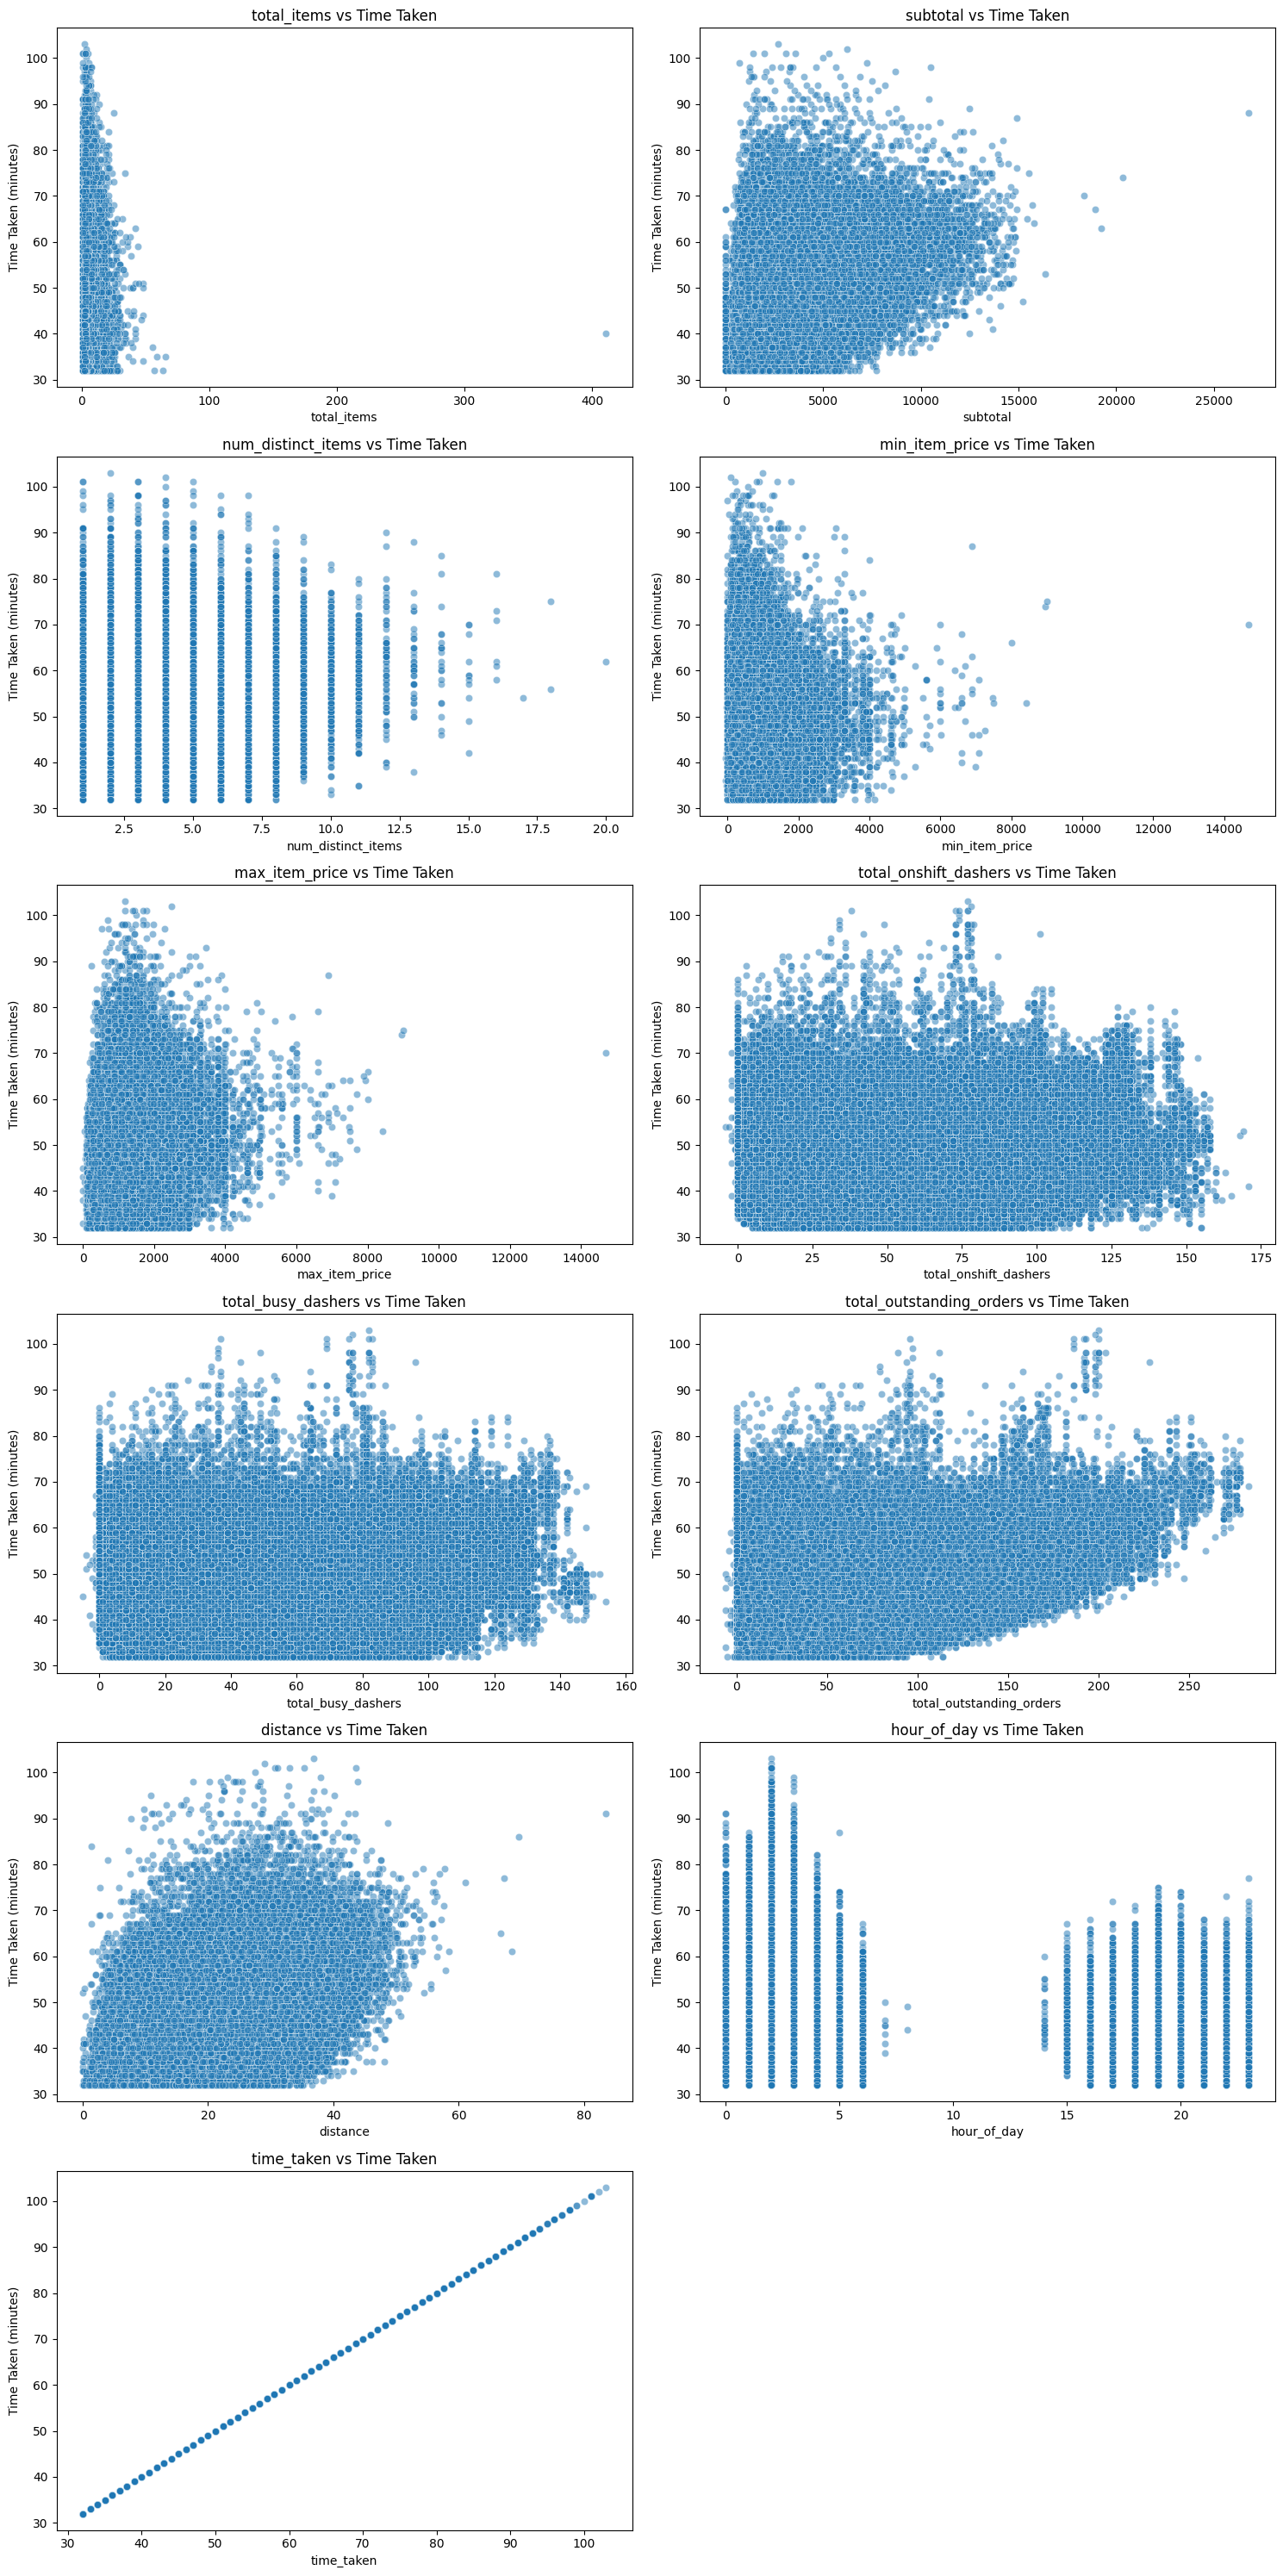

In [44]:
# Scatter plot to visualise the relationship between time_taken and other features

print("\n Plotting scatter for numerical features vs time_taken..")
num_cols_to_plot = len(numerical_cols)
n_rows = math.ceil(num_cols_to_plot/ 2)
n_cols = 2

plt.figure(figsize=(15, n_rows*5)) #Adjust figure size dynamically based on number of rows.
                                   #Each row gets 5 inches height, total width 15 inches.
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.scatterplot(data = train_df, x=col, y = 'time_taken', alpha= 0.5)
    plt.title(f'{col} vs Time Taken')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')
plt.tight_layout()
plt.show()


Plotting Time taken distribution by hour of day.


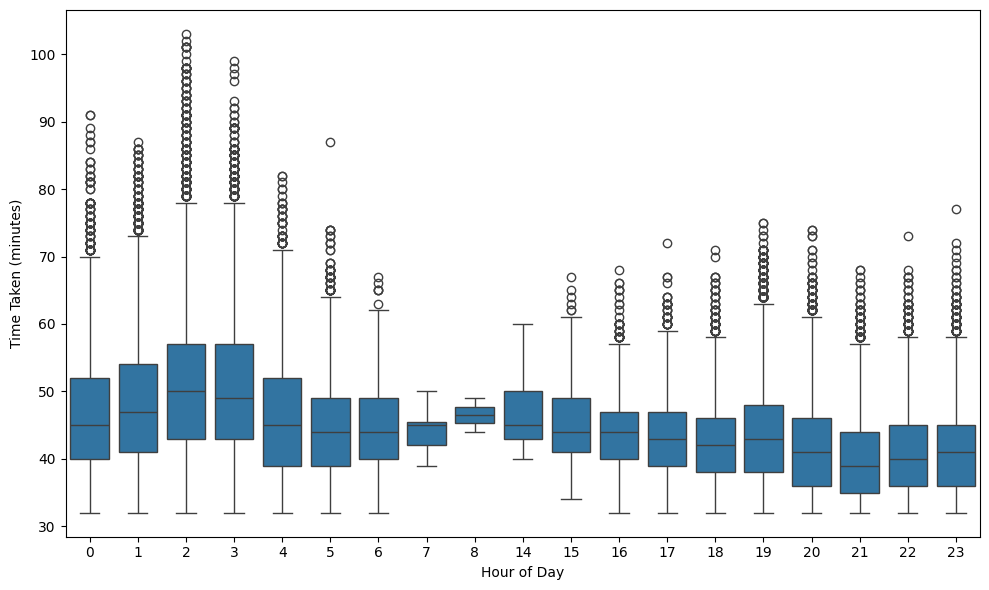


Plotted Time taken distribution by hour of day.


In [45]:
# Show the distribution of time_taken for different hours
print("\nPlotting Time taken distribution by hour of day.")
plt.figure(figsize=(10,6))
sns.boxplot(data = train_df, x = 'hour_of_day' , y = 'time_taken')
plt.xlabel('Hour of Day')
plt.ylabel('Time Taken (minutes)')
plt.tight_layout()
plt.show()
print("\nPlotted Time taken distribution by hour of day.")

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

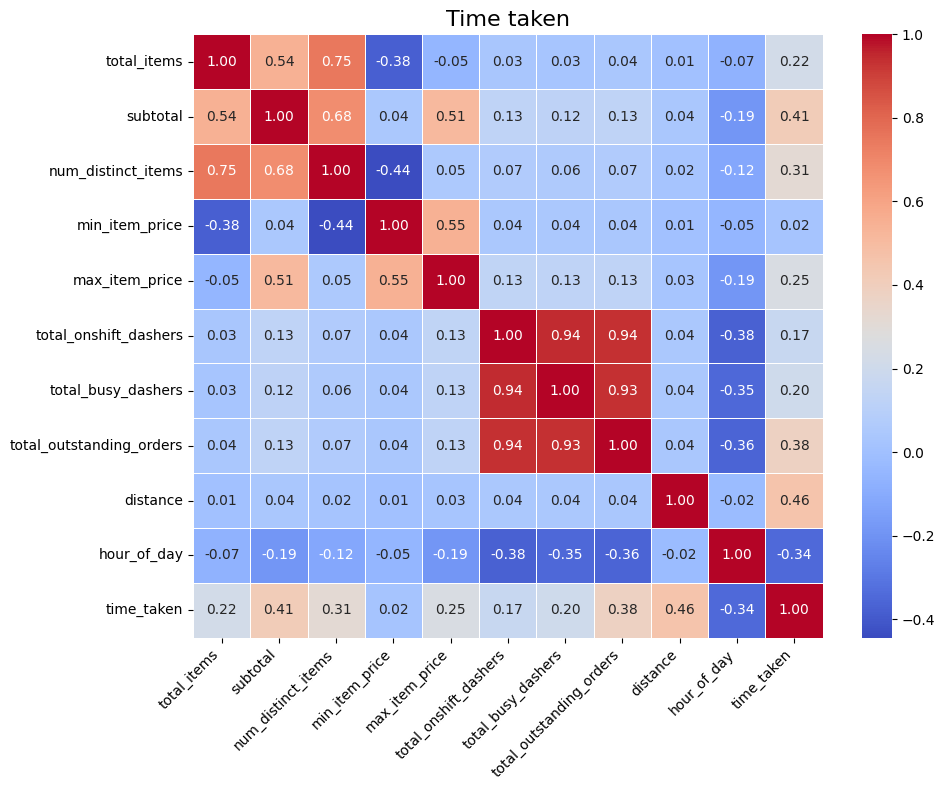

In [48]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10,8))
correlation_matrix = train_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features' and 'Time taken', fontsize=16)
plt.xticks(rotation = 45, ha='right')
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [50]:
# Drop 3-5 weakly correlated columns from training dataset
weak_corr_cols = correlation_matrix['time_taken'][abs(correlation_matrix['time_taken']) < 0.05].index.tolist()
if'time_taken' in weak_corr_cols:
    weak_corr_cols.remove('time_taken')
print(f"Columns with weak correlations to 'time_taken'(abs < 0.05): {weak_corr_cols}")
X_train_filtered = X_train.drop(columns= weak_corr_cols, errors ='ignore')
print("\nShape of X_train after dropping weakly correlated columns:", X_train_filtered .shape)
print("Dropped weekly correlated columns from training sets.")


Columns with weak correlations to 'time_taken'(abs < 0.05): ['min_item_price']

Shape of X_train after dropping weakly correlated columns: (140621, 13)
Dropped weekly correlated columns from training sets.


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

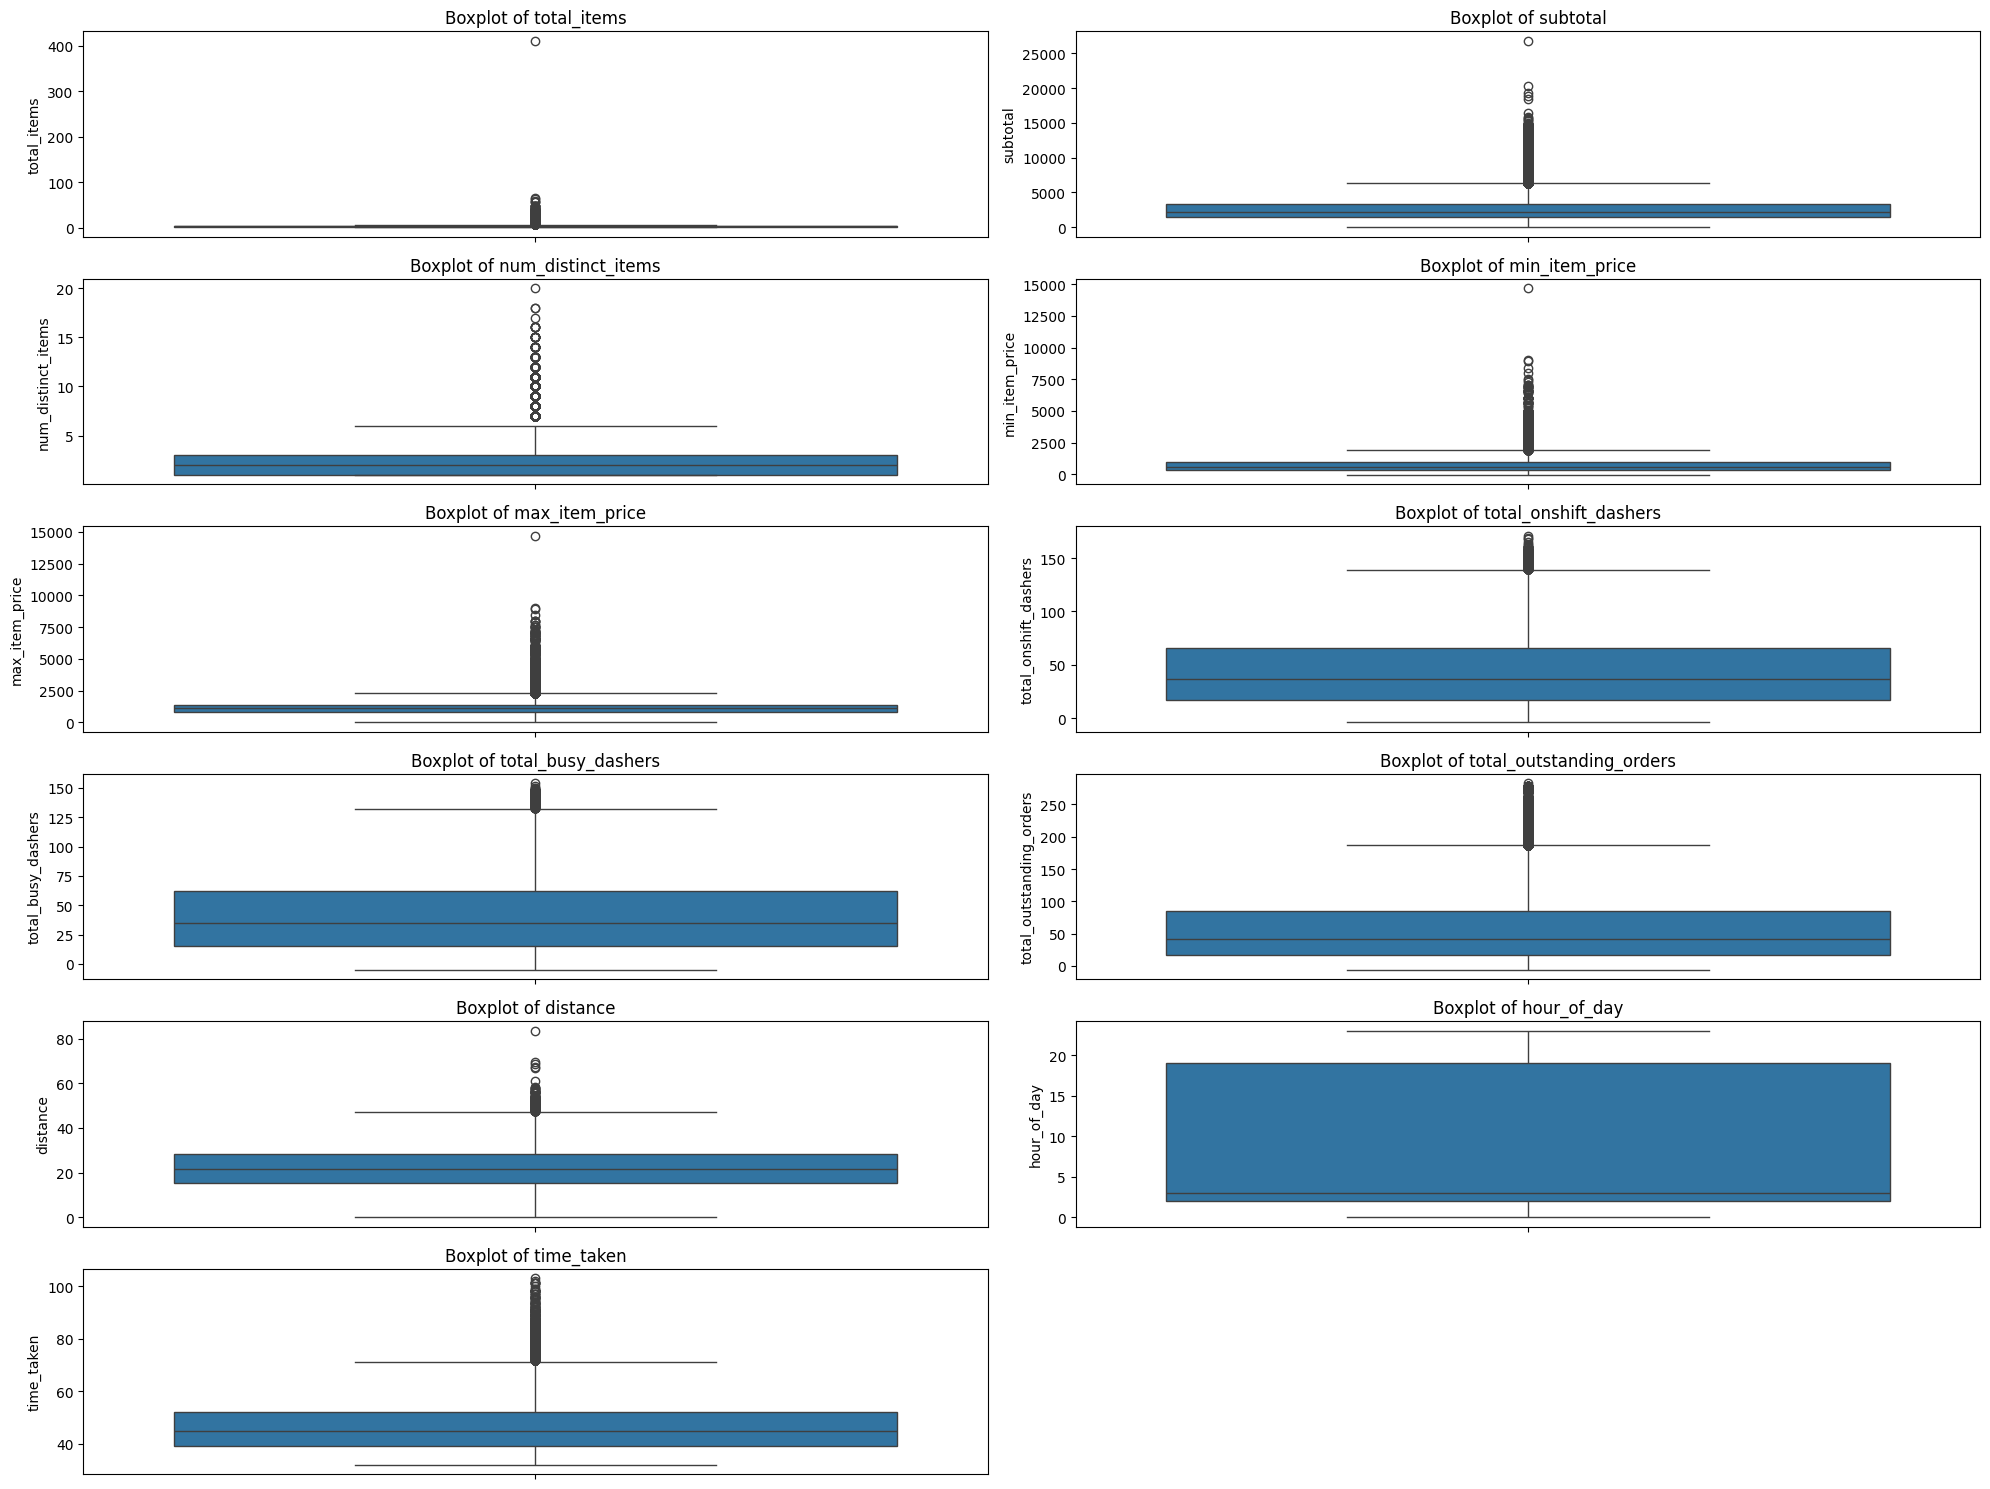

Plotted boxplots for outlier visualization.


In [53]:
# Boxplot for time_taken
plt.figure(figsize=(20,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 2+1, 2, i+1)
    sns.boxplot(y=train_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()
print("Plotted boxplots for outlier visualization.")


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns


Outliers handled for numerical columns and 'time_taken' in training data using IQR caping.


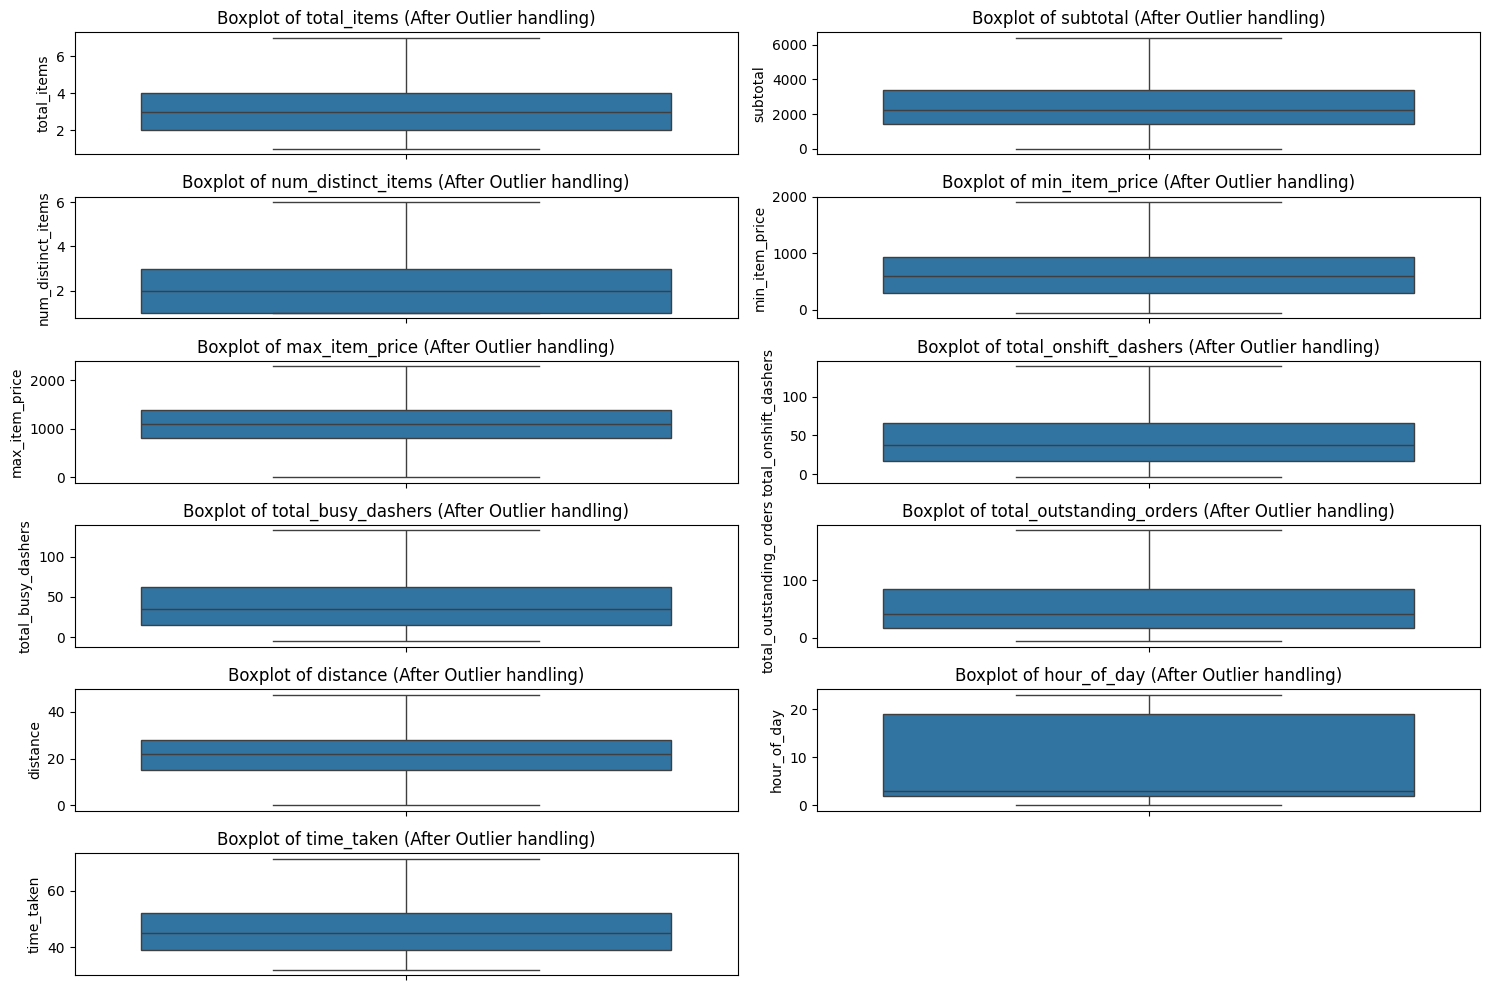

Re-plotted boxplots to show outlier handling effect.


In [55]:
# Handle outliers
for col in numerical_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_df[col] = np.where(train_df[col] < lower_bound, lower_bound, train_df[col])
    train_df[col] = np.where(train_df[col] > upper_bound, upper_bound, train_df[col])

print("\nOutliers handled for numerical columns and 'time_taken' in training data using IQR caping.")

#Verify by replotting boxplots after outlier handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 2+1, 2, i+1)
    sns.boxplot(y=train_df[col])
    plt.title(f'Boxplot of {col} (After Outlier handling)')
plt.tight_layout()
plt.show()
print("Re-plotted boxplots to show outlier handling effect.")


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [57]:
# Define numerical and categorical columns for easy EDA and data manipulation

#Recombine X_test and y_test for easier EDA on the training set
test_df = pd.concat([X_test, y_test], axis=1)

numerical_cols_test = test_df.select_dtypes(include = np.number).columns.tolist()

categorical_cols_test = test_df.select_dtypes(include = 'category').columns.tolist()

print("\n Numerical columns:", numerical_cols_test)
print("\n Categorical columns:", categorical_cols_test)


 Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour_of_day', 'time_taken']

 Categorical columns: ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness


 Plotting Distribution for numerical columns in Test set..


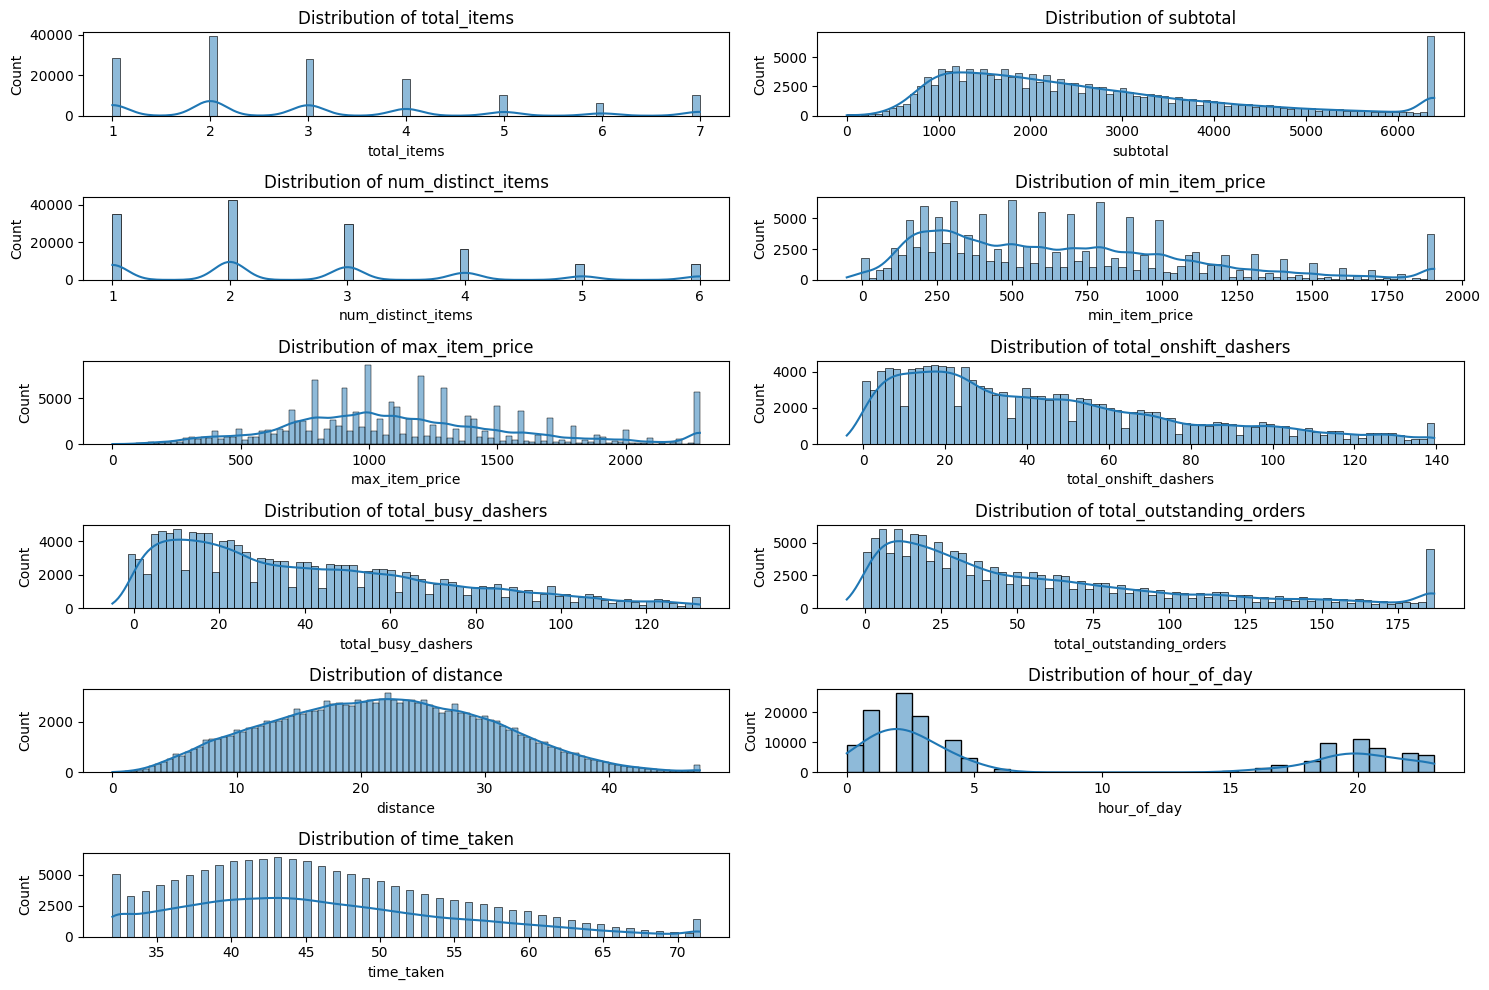

In [60]:
# Plot distributions for all numerical columns
print("\n Plotting Distribution for numerical columns in Test set..")
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols_test):
    plt.subplot(len(numerical_cols) //2+1, 2, i+1)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



##### **4.1.2**
Check the distribution of categorical features


 Plotting distribution for categorical columns in Test set..


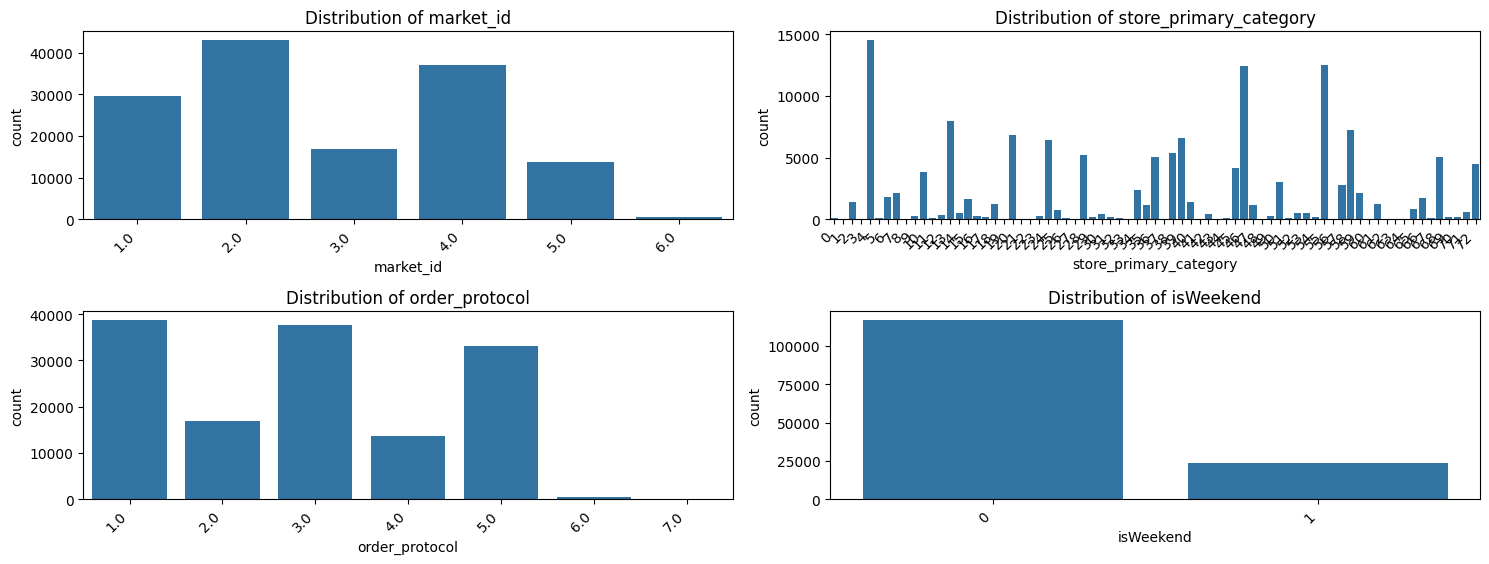

In [62]:
# Distribution of categorical columns

print("\n Plotting distribution for categorical columns in Test set..")
plt.figure(figsize=(15,8))
for i, col in enumerate(categorical_cols_test):
    plt.subplot(len(categorical_cols) // 2+1, 2, i+1)
    sns.countplot(data = train_df, x =col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

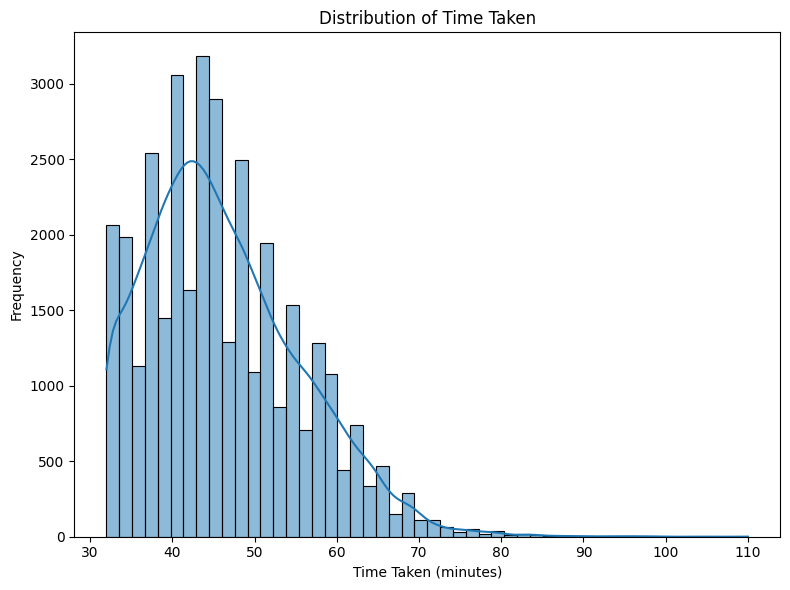

In [64]:
# Distribution of time_taken

plt.figure(figsize =(8,6))
sns.histplot(test_df['time_taken'], kde=True, bins=50)
plt.title('Distribution of Time Taken')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`


 Plotting scatter for numerical features vs time_taken..


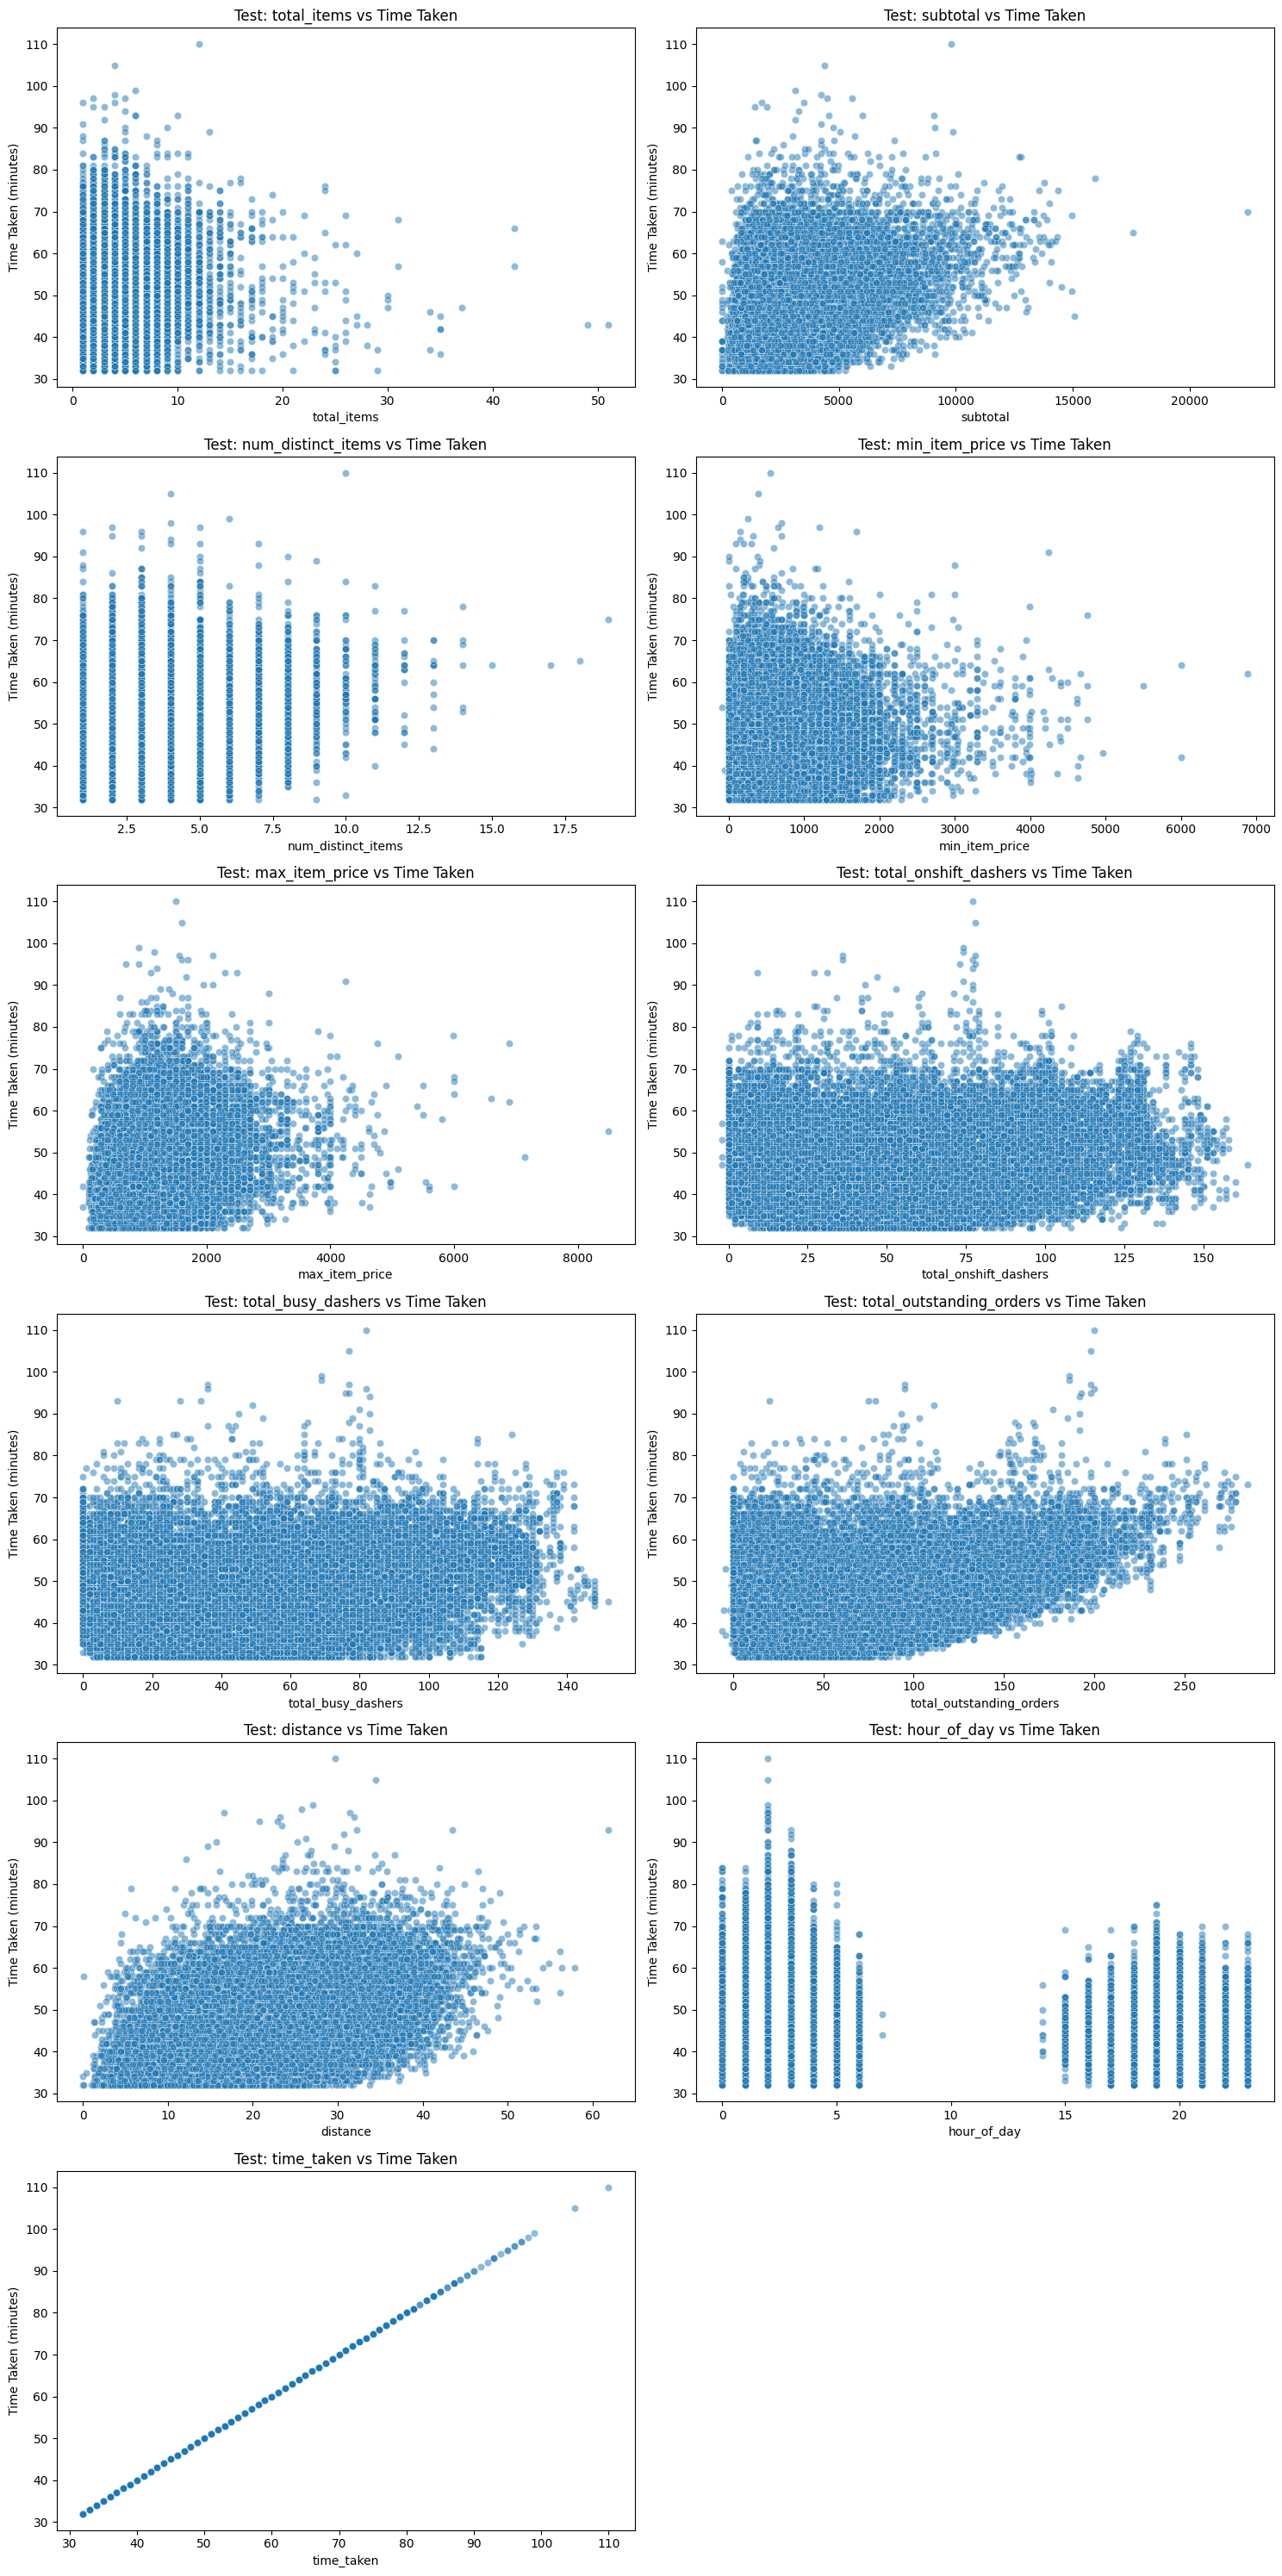

In [66]:
# Scatter plot to visualise the relationship between time_taken and other features
print("\n Plotting scatter for numerical features vs time_taken..")
num_cols_to_plot_test = len(numerical_cols_test)
n_rows_test = math.ceil(num_cols_to_plot_test/ 2)
n_cols_test = 2

plt.figure(figsize=(15, n_rows_test*5)) #Adjust figure size dynamically based on number of rows.
                                   #Each row gets 5 inches height, total width 15 inches.
for i, col in enumerate(numerical_cols_test):
    plt.subplot(n_rows_test, n_cols_test, i+1)
    sns.scatterplot(data = test_df, x=col, y = 'time_taken', alpha= 0.5)
    plt.title(f'Test: {col} vs Time Taken')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')
plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

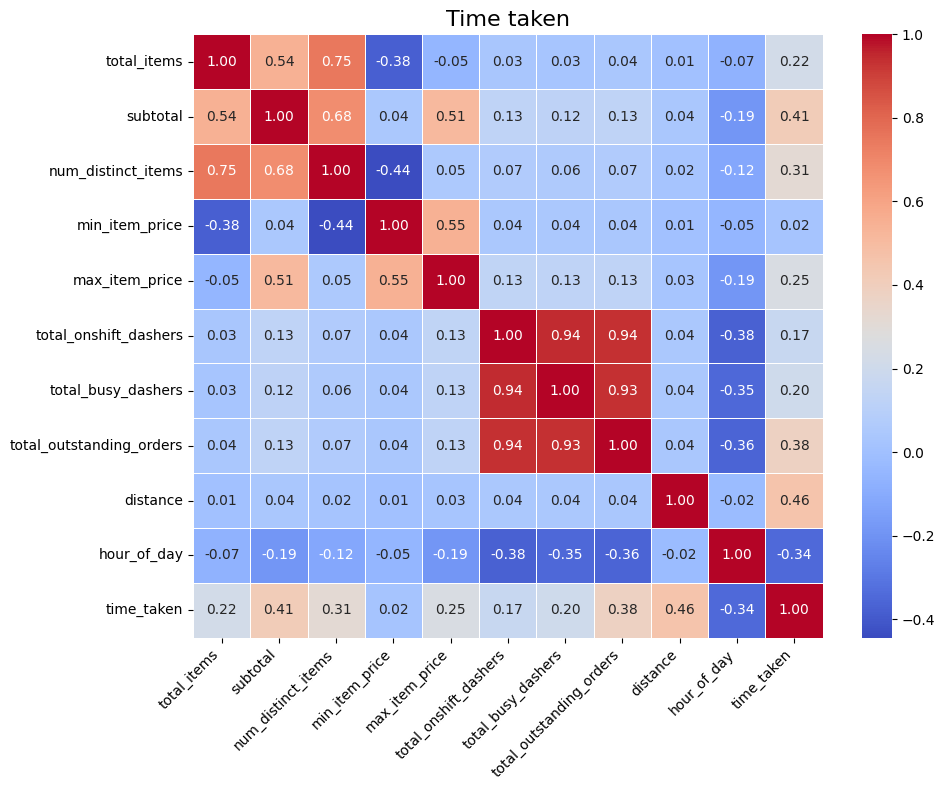

Columns with weak correlations test to 'time_taken'(abs < 0.05): ['min_item_price']

Shape of X_train after dropping weakly correlated columns: (35156, 13)
Dropped weekly correlated columns from training sets.


In [68]:
# Drop the weakly correlated columns from training dataset
plt.figure(figsize=(10,8))
correlation_matrix_test = test_df[numerical_cols_test].corr()
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features' and 'Time taken', fontsize=16)
plt.xticks(rotation = 45, ha='right')
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

weak_corr_cols_test = correlation_matrix_test['time_taken'][abs(correlation_matrix_test['time_taken']) < 0.05].index.tolist()
if'time_taken' in weak_corr_cols:
    weak_corr_cols_test.remove('time_taken')
print(f"Columns with weak correlations test to 'time_taken'(abs < 0.05): {weak_corr_cols_test}")
X_test_filtered = X_test.drop(columns= weak_corr_cols, errors ='ignore')
print("\nShape of X_train after dropping weakly correlated columns:", X_test_filtered .shape)
print("Dropped weekly correlated columns from training sets.")

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [71]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [73]:
# Apply scaling to the numerical columns
numerical_cols_for_scaling = X_train_filtered.select_dtypes(include = np.number).columns.tolist()
#Instantiate the object
scaler =StandardScaler()

#Fit on the training data and transform 
X_train_filtered[numerical_cols_for_scaling] = scaler.fit_transform(X_train_filtered[numerical_cols_for_scaling])

#Use the same scaler to transform the test data
X_test_filtered[numerical_cols_for_scaling] = scaler.transform(X_test_filtered[numerical_cols_for_scaling])

#Scaling y 
#Instantiate the object
y_scaler =StandardScaler()

#Reshape y to 2D as required by scaler
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled= y_scaler.transform(y_test.values.reshape(-1,1))

#convert back to series
y_train_scaled = pd.Series(y_train_scaled.flatten(), name ='time_taken')
y_test_scaled =  pd.Series(y_test_scaled.flatten(), name ='time_taken')

print("Numerical columns in training and test sets have been standardized(Z-score).")
print("\nFirst 5 rows of X_train_filtered:")
print(X_train_filtered[numerical_cols_for_scaling].head())

print("\nFirst 5 rows of X_test_filtered:")
print(X_test_filtered[numerical_cols_for_scaling].head())

print("\nFirst 5 values of y_train_scaled:")
print(y_train.head())

print("\nFirst 5 values of y_test_scaled:")
print(y_test.head())

Numerical columns in training and test sets have been standardized(Z-score).

First 5 rows of X_train_filtered:
        total_items  subtotal  num_distinct_items  max_item_price  \
42111     -0.810814 -0.736089           -1.030286        0.335523   
58452      0.660479  0.867677            1.432233       -0.462162   
20644      1.028302  2.832087            0.200973        0.512787   
79735     -0.075168  0.526160            0.200973        0.512787   
167933     0.660479  3.211854            1.432233        2.595632   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
42111               -0.635108           -0.679902                 -0.744829   
58452                1.940426            1.809014                  2.824571   
20644                1.014392            1.155673                  1.077843   
79735                2.374505            1.995683                  2.179041   
167933              -0.027397            0.066773                  0.052590   

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [77]:
# Create/Initialise the model
#add a constant 
X_train_sm = sm.add_constant(X_train_filtered.reset_index(drop=True))
y_train_scaled_aligned = y_train_scaled.reset_index(drop=True)

#fit the OLS model
lr = sm.OLS(y_train_scaled_aligned,X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 7.978e+04
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        15:36:04   Log-Likelihood:                -50095.
No. Observations:              140621   AIC:                         1.002e+05
Df Residuals:                  140607   BIC:                         1.004e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3492      0.003    109.552      0.000       0.343       0.355
market_id                   -0.0672      0.001    -96.447      0.000      -0.069      -0.066
store_primary_category       0.0006   4.49e-05     12.848      0.000       0.000       0.001
order_protocol              -0.0733      0.001   -117.426      0.000      -0.075      -0.072
total_items                 -0.0118      0.001     -8.204      0.000      -0.015      -0.009
subtotal                     0.2464      0.002    144.092      0.000       0.243       0.250
num_distinct_items           0.0942      0.002     56.837      0.000       0.091       0.097
max_item_price               0.0408      0.001     32.129      0.000       0.038       0.043
total_onshift_dashers       -1.3377      0.003   -421.312      0.000      -1.344      -1.331
total_busy_dashers          -0.5068      0.003   -163.008      0.000      -0.513      -0.501
total_outstanding_orders     1.9835      0.003    683.375      0.000       1.978       1.989
distance                     0.4479      0.001    485.112      0.000       0.446       0.450
hour_of_day                 -0.2296      0.001   -226.509      0.000      -0.232      -0.228
isWeekend                    0.1638      0.002     66.255      0.000       0.159       0.169
==============================================================================
Omnibus:                    41702.176   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           172510.428
Skew:                           1.419   Prob(JB):                         0.00
Kurtosis:                       7.625   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# Train the model using the training data


In [79]:
# Make predictions


In [80]:
# Find results for evaluation metrics



Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [84]:
# Loop through the number of features and test the model

#Running RFE with the output number of the variable equal to 13
lm= LinearRegression()
lm.fit(X_train_filtered,y_train_scaled_aligned)

rfe = RFE(lm, n_features_to_select=13)
rfe = rfe.fit(X_train_filtered,y_train_scaled_aligned)

In [85]:
list(zip(X_train_filtered.columns,rfe.support_,rfe.ranking_))

[('market_id', True, 1),
 ('store_primary_category', True, 1),
 ('order_protocol', True, 1),
 ('total_items', True, 1),
 ('subtotal', True, 1),
 ('num_distinct_items', True, 1),
 ('max_item_price', True, 1),
 ('total_onshift_dashers', True, 1),
 ('total_busy_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('hour_of_day', True, 1),
 ('isWeekend', True, 1)]

In [86]:
col= X_train_filtered.columns[rfe.support_]
col

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour_of_day', 'isWeekend'],
      dtype='object')

In [87]:
#Calculate the VIFS
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X = X_train_filtered
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7      total_onshift_dashers  11.86
8         total_busy_dashers  11.37
9   total_outstanding_orders   9.92
2             order_protocol   3.46
4                   subtotal   3.44
0                  market_id   3.39
1     store_primary_category   3.27
5         num_distinct_items   3.24
3                total_items   2.42
6             max_item_price   1.89
11               hour_of_day   1.21
12                 isWeekend   1.20
10                  distance   1.00

In [88]:
# Dropping "total_onshift_dashers"
X_train_new = X_train_filtered.drop(['total_onshift_dashers'], axis =1)

In [89]:
# Build the final model with selected number of features

# Rebuilding the model without total_onshift_dashers"
X_train_sm = sm.add_constant(X_train_new.reset_index(drop=True))
y_train_scaled_aligned = y_train_scaled.reset_index(drop=True)
#fit the OLS model
lr = sm.OLS(y_train_scaled_aligned,X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                 3.166e+04
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        15:36:06   Log-Likelihood:            -1.0750e+05
No. Observations:              140621   AIC:                         2.150e+05
Df Residuals:                  140608   BIC:                         2.152e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3924      0.005     81.885      0.000       0.383       0.402
market_id                   -0.0776      0.001    -74.157      0.000      -0.080      -0.076
store_primary_category       0.0005   6.75e-05      7.578      0.000       0.000       0.001
order_protocol              -0.0809      0.001    -86.181      0.000      -0.083      -0.079
total_items                 -0.0076      0.002     -3.548      0.000      -0.012      -0.003
subtotal                     0.2427      0.003     94.395      0.000       0.238       0.248
num_distinct_items           0.0920      0.002     36.908      0.000       0.087       0.097
max_item_price               0.0398      0.002     20.841      0.000       0.036       0.044
total_busy_dashers          -1.2342      0.004   -317.400      0.000      -1.242      -1.227
total_outstanding_orders     1.4297      0.004    367.309      0.000       1.422       1.437
distance                     0.4427      0.001    318.815      0.000       0.440       0.445
hour_of_day                 -0.1848      0.002   -121.884      0.000      -0.188      -0.182
isWeekend                    0.2222      0.004     59.870      0.000       0.215       0.229
==============================================================================
Omnibus:                    12971.100   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39909.188
Skew:                           0.486   Prob(JB):                         0.00
Kurtosis:                       5.422   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
#Calculate the VIFS again for the new model

vif=pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8   total_outstanding_orders  7.89
7         total_busy_dashers  7.84
2             order_protocol  3.46
4                   subtotal  3.44
0                  market_id  3.39
1     store_primary_category  3.27
5         num_distinct_items  3.24
3                total_items  2.42
6             max_item_price  1.89
10               hour_of_day  1.19
11                 isWeekend  1.19
9                   distance  1.00

In [91]:
# Build the final model with selected number of features



## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [94]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
X_train_constant = sm.add_constant(X_train_new)
#Predict using the final model
y_train_pred = lr_model.predict(X_train_constant)
#Calculate residuals
residuals = y_train_scaled - y_train_pred

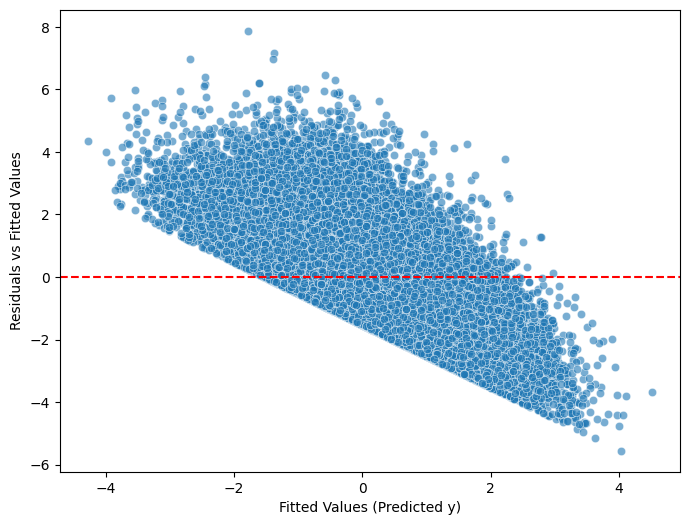

In [95]:
#This checks linearity and homoscedasticity
plt.figure(figsize =(8,6))
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.6)
plt.axhline(0, color = 'red', linestyle ='--')
plt.xlabel('Fitted Values (Predicted y)')
plt.ylabel('Residuals vs Fitted Values')
plt.show()

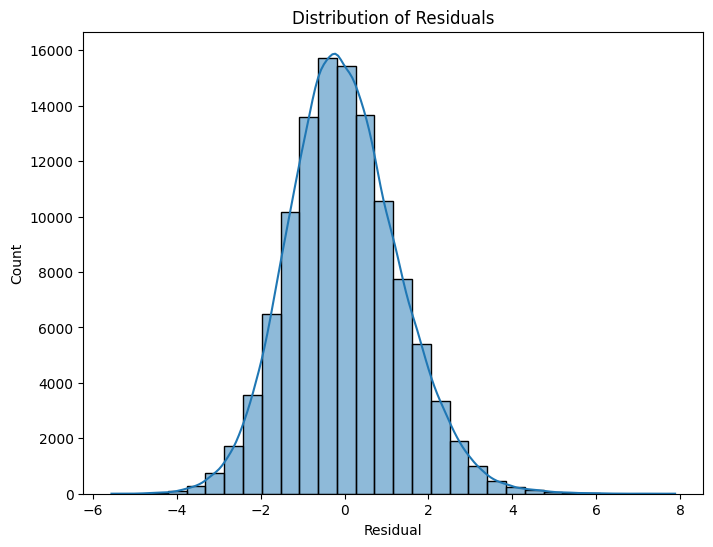

In [96]:
#Histogram of residuals
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde =True)
plt.xlabel('Residual')
plt.title('Distribution of Residuals')
plt.show()

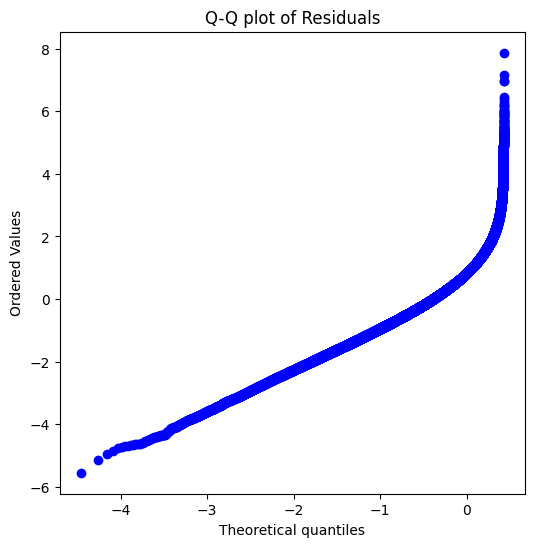

In [97]:
#Q-Q plot
import scipy.stats as stats

plt.figure(figsize=(6,6))
stats.probplot(residuals, dist ='norm',plot = plt)
plt.title("Q-Q plot of Residuals")
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [114]:
#copy original data
X_train_original = X_train.copy()
X_test_original = X_test.copy()

selected_features = X_train_filtered.select_dtypes(include = np.number).columns.tolist()
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_original)
X_test_scaled = scaler.transform(X_test_original)

#Convert scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns= X_train_original.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns= X_test_original.columns)

# Train LinearRegression on scaled features
lr = LinearRegression()
lr.fit(X_train_scaled_df[selected_features],y_train)

#Get scaled coefficients
scaled_coefficients = lr.coef_

#Create DataFrame for Scaled coefficients
coef_df_scaled = pd.DataFrame({
    'feature': selected_features,
    'scaled_coefficients': scaled_coefficients
}).sort_values(by='scaled_coefficients', key=abs, ascending=False)
print("Scaled Coefficients:")
print(coef_df_scaled)

#Train model on unscaled features
X_train_unscaled = X_train_original[selected_features]
X_test_unscaled = X_test_original[selected_features]

lr_unscaled = LinearRegression()
lr_unscaled.fit(X_train_unscaled, y_train)

# get unscaled coefficients
unscaled_coefficients = lr_unscaled.coef_
 
#Create DataFrame for unscaled coefficients
coef_df_unscaled = pd.DataFrame({
    'feature': selected_features,
    'unscaled_coefficients': unscaled_coefficients
}).sort_values(by='unscaled_coefficients', key=abs, ascending=False)
print("\nUnscaled Coefficients:")
print(coef_df_unscaled)

#Merge both DataFrames for comparison
coef_comparison = pd.merge(coef_df_scaled, coef_df_unscaled, on ='feature')
print("\nComparison of Scaled vs Unscaled Coefficients:")
print(coef_comparison)


Scaled Coefficients:
                    feature  scaled_coefficients
6  total_outstanding_orders            18.463039
4     total_onshift_dashers           -12.778143
5        total_busy_dashers            -4.624656
7                  distance             4.177891
1                  subtotal             2.323685
8               hour_of_day            -2.205339
2        num_distinct_items             0.917226
3            max_item_price             0.500128
0               total_items            -0.141543

Unscaled Coefficients:
                    feature  unscaled_coefficients
2        num_distinct_items               0.564671
7                  distance               0.477352
4     total_onshift_dashers              -0.369781
6  total_outstanding_orders               0.350542
8               hour_of_day              -0.254163
5        total_busy_dashers              -0.143880
0               total_items              -0.052063
1                  subtotal               0.001270
3     

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'
coef_total_items = lr_model.params['total_items']
print(f"Coefficient for 'total_items': {coef_total_items:.4f}")



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>There are three categorical variables store_primary_category, order_protocol, isWeekend.
When a delivery occurs on a weekend, thepredicted delivery time increases by approximately 0.2222 standard deviations, compared to a weekday.
Certain store types increase delivery time by 0.24 SD
Some ordering methods lead to slower the deliveries 


---


##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> The parameter test_size = 0.2 in data spliting specifies what proportion of the data set should be reserved for the test set.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> The variable distance has the highest positive correlation(0.46) with the target variable time_taken. This suggests that as the distance increases, the time taken for delivery also tends to increase.




---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> I used boxplots to visually inspect the presence of outliers in all numerical columns of the training dataset.
> Boxplots effectively highlight values that lie outside the interquartile range(IQR). Below the first quartile and above the third quartile.
> This gave me a clear idea of which variables had extreme values likely to skew the model.
>-  I applied IQR based caping to treat the outliers.
> For each numerical feature, I calculated the Q1 which is 25th percentile and Q3 which is 75th percentile
> Computed the IQR = Q3-Q1
> --- Defined acceptable value boundries
>  - Lower bound = Q1- 1.5* IQR
>  - Upper bound = Q3 + 1.5* IQR
>  - Then I replaced the values below lower bound with lower bound and the values above upper bound with upper bound.
> This method retains all data points , reducing the impact of outliers while preserving the overall data distribution.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Based on the final model, the top 3 features significantly affecting the delivery time are:-
> - total_outstanding_order which has +1.4297 coefficient value. It means a unit increase in total outstanding orders increases the predicted delivery time significantly.
> - total_busy_dashers which has -1.2342 coefficient value. It means a unit increase in busy dashers reduces the delivery time possibly due to better resource allocation.
> - distance which has +0.4427 coefficient value. As expected, longer distance leads to higher delivery time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear Regression is a supervised learning algorithm used for predicting a continuous dependent variable based on one or more input features. It assumes a linear relationship between the independent variables X and the dependent variable y.
> There are two types of linear Regression
> - Simple Linear Regression(One independent variable)
> - Multiple Linear Regression(2 or more independent variables)
> - We use Linear Regression to find the best fitting line such that, The sum of squared differences between actual and predicted value is minimized. This is known as the Ordinary least squares method.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> Simple linear regression models the relationship between one independent variable and one dependent variable using the straight line whereas Multiple linear regression models the relationship between two or more independent variables and one dependent variable.




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>In Machine learning, a cost function is a mathematical function that measures the error or difference between the predicted outputs of a model and the actual targeted values.
>Most learning algorithms use optimization techniques like gradient descent to minimize the cost function by adjusting the model parameters.





---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> > Overfitting happens when a model is too complex, and it learns the training data too well, including noise and outliers.
> - Very high accuracy on training data
> - Poor Accuracy on test data
> - High Variance
> > Underfitting happens when a model is too simple to capture the underlying patterns in the data.
> - Poor performance on training data
> - Poor performance on test data
> - Model makes assumptions that are too strong



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> Residual plot is a scatter plot of residuals on the y-axis and the independent values on the x-axis.
> - It helps to check linearity and residuals should be randomly scattered and if they show a pattern like a curve, it indicates a non linear relationship.
> - It helps to check homoscedasticity and the spread of residuals should be roughly constant across all levels of the predictor. If the spreads increase or decrease then it suggests heteroscedasticity.
> - Helps to check independency. There shouldn't be any pattern or clusters in the residuals.

# Priyanka Chatterjee
# Date - 10/06/2025
